In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("classification_data_01.csv")
X = df.drop("Class", axis = 1)
y = df["Class"]

In [3]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2,
                                          random_state = 123)
clf = DecisionTreeClassifier()
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

In [4]:
accuracy_score(y_te, y_pred)

0.9890909090909091

In [5]:
from sklearn.tree import export_text

In [6]:
text_rep = export_text(clf, feature_names = list(X.columns))
# print(text_rep)

In [7]:
from sklearn.tree import plot_tree

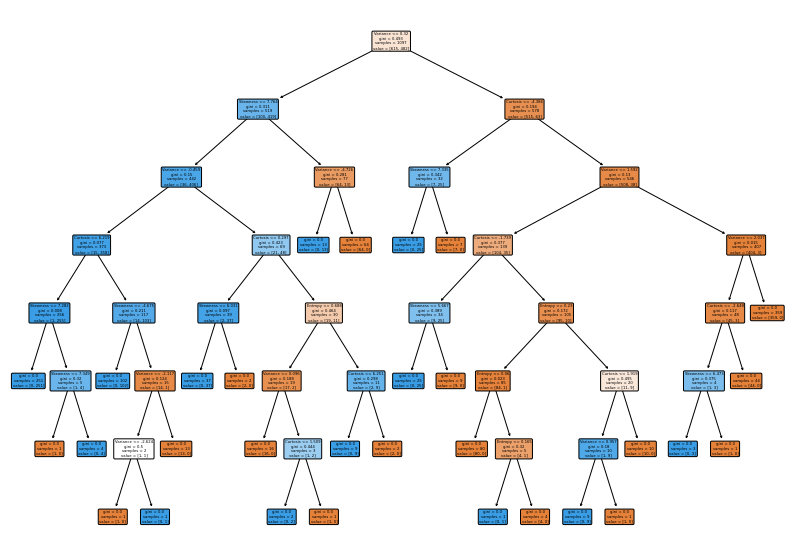

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 10))

plot = plot_tree(clf, 
                 feature_names = list(X.columns),
                 rounded = True, filled = True)

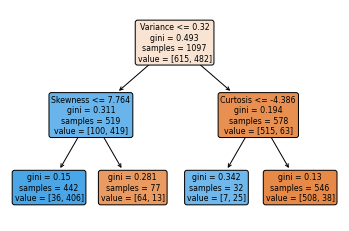

In [9]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_tr, y_tr)
plot = plot_tree(clf, 
                 feature_names = list(X.columns),
                 rounded = True, filled = True)

In [13]:
# !pip install dtreeviz --user

In [17]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, X, y, 
               target_name = "target",
               feature_names = list(X.columns),
               scale = 1)
viz

In [2]:
from statsmodels.formula.api import ols

df = pd.read_csv("linear_regression_01.csv")
model = ols(formula = "y ~ x", data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Tue, 02 Aug 2022   Prob (F-statistic):             0.0848
Time:                        13:31:01   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.2

In [21]:
df = pd.read_csv("iris.csv")
df.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa

In [24]:
model1 = ols(formula = "SepalLength ~ SepalWidth", data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            SepalLength   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Tue, 02 Aug 2022   Prob (F-statistic):              0.152
Time:                        11:25:43   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5262      0.479     13.628      0.0

In [23]:
model2 = ols(formula = "PetalLength ~ PetalWidth", data = df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            PetalLength   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           4.68e-86
Time:                        11:24:32   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.0

In [9]:
df = pd.read_csv("bike.csv")
df_model = df.loc[:, "temp":"casual"]

formula = "casual ~ temp + atemp + humidity + windspeed"
model = ols(formula = formula, data = df_model)
result = model.fit()
# print(result.summary())

In [10]:
pred = result.predict(df_model)
pred

0        -7.143273
1        -8.443802
2        -8.443802
3        -2.123176
4        -2.123176
           ...    
10881    35.235417
10882    23.928255
10883    17.108515
10884    19.264203
10885    13.118233
Length: 10886, dtype: float64

In [12]:
df_result = pd.DataFrame(dict(y_true = df_model["casual"],
                              y_pred = pred))
df_result.iloc[:200,].plot.line()

<AxesSubplot:>

In [15]:
# dir(result)
print(result.rsquared)
print(result.rsquared_adj)

0.32218000481811704
0.32193082919264815


In [19]:
result.params # 계수와 절편
result.pvalues # 각 계수와 절편의 p-value

In [28]:
# result.resid # 잔차
df_resid = result.resid.reset_index()
df_resid.head(2)

<AxesSubplot:xlabel='index', ylabel='0'>

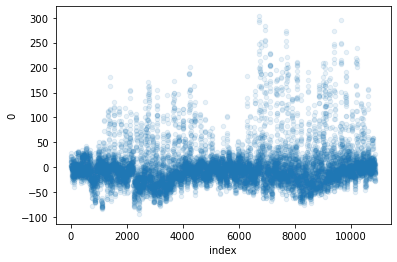

In [27]:
df_resid.plot.scatter(x = "index", y = 0, alpha = 0.1)

<AxesSubplot:xlabel='pred', ylabel='0'>

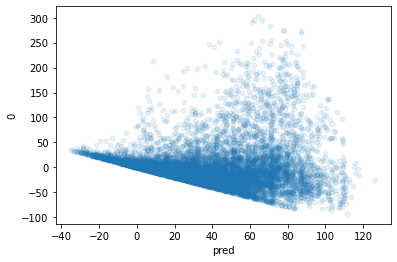

In [30]:
df_resid["pred"] = pred
df_resid.plot.scatter(x = "pred", y = 0, alpha = 0.1)

In [40]:
df_model.corr().round(3)

temp  atemp  humidity  windspeed  casual
temp       1.000  0.985    -0.065     -0.018   0.467
atemp      0.985  1.000    -0.044     -0.057   0.462
humidity  -0.065 -0.044     1.000     -0.319  -0.348
windspeed -0.018 -0.057    -0.319      1.000   0.092
casual     0.467  0.462    -0.348      0.092   1.000

In [42]:
!pip install patsy --user

In [43]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [45]:
y, X = dmatrices("casual ~ temp + atemp + humidity + windspeed",
                 df_model, return_type = "dataframe")

In [48]:
df_vif = pd.DataFrame()
df_vif["features"] = X.columns
df_vif["VIF_factor"] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

features  VIF_factor
0  Intercept   29.863031
1       temp   35.376203
2      atemp   35.436388
3   humidity    1.121811
4  windspeed    1.163748

In [50]:
y, X = dmatrices("casual ~ temp + humidity + windspeed",
                 df_model, return_type = "dataframe")
df_vif = pd.DataFrame()
df_vif["features"] = X.columns[1:]
df_vif["VIF_factor"] = [vif(X.values, i) for i in range(1, X.shape[1])]
df_vif

features  VIF_factor
0       temp    1.005907
1   humidity    1.119196
2  windspeed    1.114830

In [51]:
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [53]:
dia = pd.read_csv("diamonds.csv")
dia.head(1)

carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

In [55]:
dia_dum = pd.get_dummies(dia, columns = ["cut"])
dia_dum = dia_dum.drop(["color", "clarity", "depth", "table"], axis = 1)
dia_dum.head(1)

carat  price     x     y     z  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
0   0.23    326  3.95  3.98  2.43         0         0          1            0   

   cut_Very Good  
0              0

In [56]:
dia_tr, dia_te = train_test_split(dia_dum, train_size = 0.7,
                                  random_state = 123)
print(len(dia_tr), len(dia_te))

37758 16182


In [60]:
dia_tr = dia_tr.rename(columns = {"cut_Very Good": "cut_VeryGood"})
dia_tr = dia_tr.set_index("price").reset_index()

In [61]:
dia_tr.head(1)

price  carat     x    y    z  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
0   5669   1.06  6.63  6.6  4.0         0         0          1            0   

   cut_VeryGood  
0             0

In [64]:
formula = "price ~ " + " + ".join(dia_tr.columns[1:])
formula

'price ~ carat + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_VeryGood'

In [65]:
model1 = ols(formula = formula, data = dia_tr)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 2.917e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:32:58   Log-Likelihood:            -3.2939e+05
No. Observations:               37758   AIC:                         6.588e+05
Df Residuals:                   37749   BIC:                         6.589e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1180.4234     99.404     11.875   

In [66]:
formula = "price ~ " + " + ".join(dia_tr.columns[1:-1])
model2 = ols(formula = formula, data = dia_tr)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 2.917e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:35:03   Log-Likelihood:            -3.2939e+05
No. Observations:               37758   AIC:                         6.588e+05
Df Residuals:                   37749   BIC:                         6.589e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1739.6068    119.825     14.518      

In [ ]:
pd.get_dummies()

In [67]:
from sklearn.preprocessing import StandardScaler

In [73]:
nor_std = StandardScaler()
dia_tr_nor = nor_std.fit_transform(dia_tr)
dia_tr_nor = pd.DataFrame(dia_tr_nor, columns = dia_tr.columns)
dia_tr_nor.head(1)

price     carat         x         y         z  cut_Fair  cut_Good  \
0  0.433636  0.551161  0.798862  0.746942  0.646307 -0.175323  -0.31549   

   cut_Ideal  cut_Premium  cut_VeryGood  
0   1.223813    -0.588096     -0.534659

In [74]:
model3 = ols(formula = formula, data = dia_tr_nor)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 2.917e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:04:12   Log-Likelihood:                -16354.
No. Observations:               37758   AIC:                         3.273e+04
Df Residuals:                   37749   BIC:                         3.280e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.026e-17      0.002  -3.66e-14      

In [78]:
result3.params[1:].abs()

carat          1.225890
x              0.265232
y              0.016548
z              0.050551
cut_Fair       0.064687
cut_Good       0.026497
cut_Ideal      0.037371
cut_Premium    0.003890
dtype: float64

In [82]:
model4 = ols(formula = "price ~ carat + x", data = dia_tr_nor)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.125e+05
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:10:58   Log-Likelihood:                -17869.
No. Observations:               37758   AIC:                         3.574e+04
Df Residuals:                   37756   BIC:                         3.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.026e-17      0.002  -3.51e-14      1.0

In [90]:
result_inf = result4.get_influence()
result_inf.cooks_distance[0]

array([6.30944428e-07, 2.70469671e-07, 4.33908617e-08, ...,
       4.07878818e-06, 4.07552151e-06, 2.72094721e-06])

In [91]:
result_inf.cooks_distance[0].shape

(37758,)

In [92]:
dia_tr_nor.head(1)

price     carat         x         y         z  cut_Fair  cut_Good  \
0  0.433636  0.551161  0.798862  0.746942  0.646307 -0.175323  -0.31549   

   cut_Ideal  cut_Premium  cut_VeryGood  
0   1.223813    -0.588096     -0.534659

In [93]:
dia_te.head(1)

carat  price     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
32685   0.31    802  4.32  4.28  2.71         0         0          0   

       cut_Premium  cut_Very Good  
32685            1              0

In [94]:
dia_te_nor = nor_std.transform(dia_te)
dia_te_nor = pd.DataFrame(dia_te_nor, columns = dia_te.columns)
dia_te_nor.head(2)

carat        price         x         y         z  cut_Fair  cut_Good  \
0 -0.988463  1692.803773 -1.261399 -1.264256 -1.170381 -0.175323  -0.31549   
1 -0.988426  1973.810587 -0.672753 -0.640091 -0.677481 -0.175323  -0.31549   

   cut_Ideal  cut_Premium  cut_Very Good  
0  -0.817118     1.700404      -0.534659  
1   1.223813    -0.588096      -0.534659

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
df = pd.read_csv("iris.csv")
df.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa

In [97]:
df_tr, df_te = train_test_split(df, train_size = 0.8, random_state = 1)
model = LinearRegression().fit(X = df_tr.iloc[:, :2],
                               y = df_tr["PetalLength"])

In [98]:
print(model.coef_)
print(model.intercept_)

[ 1.79903704 -1.2209455 ]
-3.007139957432524


In [103]:
pred = model.predict(df_te.iloc[:, :2])
pred[:2]

array([2.54349287, 3.11558519])

In [104]:
from sklearn.metrics import mean_absolute_percentage_error

In [105]:
mean_absolute_percentage_error(df_te["PetalLength"], pred)

0.19880356827415332

In [109]:
from statsmodels.api import Logit
from sklearn.linear_model import LogisticRegression

In [110]:
df = pd.read_csv("diabetes.csv")
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1

In [111]:
df_model = df[["Outcome", "Glucose", "BMI", "Age"]]
df_model.head(1)

Outcome  Glucose   BMI  Age
0        1      148  33.6   50

In [112]:
sum(df_model["BMI"] == 0)

11

In [114]:
df_model = df_model.loc[df_model["BMI"] != 0, ]
len(df_model)

757

In [115]:
df_model_tr, df_model_te = train_test_split(df_model, train_size = 0.7,
                                            random_state = 1)
len(df_model_tr)

529

In [117]:
model1 = Logit(exog = df_model_tr.drop("Outcome", axis = 1),
               endog = df_model_tr["Outcome"]).fit()

Optimization terminated successfully.
         Current function value: 0.646492
         Iterations 5


In [119]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  529
Model:                          Logit   Df Residuals:                      526
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                0.001203
Time:                        16:11:53   Log-Likelihood:                -341.99
converged:                       True   LL-Null:                       -342.41
Covariance Type:            nonrobust   LLR p-value:                    0.6623
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Glucose        0.0133      0.003      4.389      0.000       0.007       0.019
BMI           -0.0486      0.011     -4.446      0.000      -0.070      -0.027
Age           -0.0148      0.008     -1.846      0.0

In [120]:
model1.params

Glucose    0.013276
BMI       -0.048632
Age       -0.014809
dtype: float64

In [121]:
model1.pvalues

Glucose    0.000011
BMI        0.000009
Age        0.064908
dtype: float64

In [122]:
import numpy as np
np.exp(model1.params) # OR

Glucose    1.013364
BMI        0.952532
Age        0.985300
dtype: float64

In [123]:
pred = model1.predict(exog = df_model_te.drop("Outcome", axis = 1))
pred[:3]

688    0.585633
638    0.235914
646    0.643441
dtype: float64

In [124]:
pred_class = np.where(pred > 0.5, 1, 0)
pred_class[:3]

array([1, 0, 1])

In [125]:
pd.crosstab(df_model_te["Outcome"], pred_class)

col_0      0   1
Outcome         
0        127  20
1         60  21

In [126]:
accuracy_score(df_model_te["Outcome"], pred_class)

0.6491228070175439

In [127]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [129]:
df.apply(lambda x: sum(x == 0))

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [130]:
df.iloc[:, 1:-1] = df.iloc[:, 1:-1].replace(0, np.nan)
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [132]:
df_notna = df.dropna()
# df_notna.isna().sum()
len(df_notna)

392

In [133]:
df_tr2, df_te2 = train_test_split(df_notna, train_size = 0.8,
                                  random_state = 1)
len(df_tr2)

313

In [138]:
model2 = Logit(exog = df_tr2.drop(["Outcome", "Age"], axis = 1),
               endog = df_tr2["Outcome"]).fit()
# print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.575196
         Iterations 5


In [160]:
pred2 = model2.predict(df_te2.drop(["Outcome", "Age"], axis = 1))
pred_class2 = np.where(pred2 > 0.5, 1, 0)
pd.crosstab(df_te2["Outcome"], pred_class2)

col_0     0   1
Outcome        
0        48   7
1        12  12

In [161]:
accuracy_score(df_te2["Outcome"], pred_class2)

0.759493670886076

In [164]:
model2 = LogisticRegression(random_state = 1, max_iter=200)
model2.fit(X = df_tr2.drop("Outcome", axis = 1),
           y = df_tr2["Outcome"])

LogisticRegression(max_iter=200, random_state=1)

In [166]:
model2.predict(df_te2.iloc[:3, :-1]) # 확률값이 0.5를 넘는 경우 1, 나머지 0

array([0, 0, 0], dtype=int64)

In [167]:
model2.predict_proba(df_te2.iloc[:3, :-1]) # 0이될 확률, 1이될 확률

array([[0.88180717, 0.11819283],
       [0.84778332, 0.15221668],
       [0.83372489, 0.16627511]])

In [170]:
pred2 = model2.predict_proba(df_te2.iloc[:, :-1])[:, 1]
pred2[:3]

array([0.11819283, 0.15221668, 0.16627511])

In [171]:
pred_class2 = np.where(pred2 > 0.5, 1, 0)
pred_class2[:3]

array([0, 0, 0])

In [172]:
pd.crosstab(df_te2["Outcome"], pred_class2)

col_0     0   1
Outcome        
0        46   9
1         8  16

In [173]:
accuracy_score(df_te2["Outcome"], pred_class2)

0.7848101265822784

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

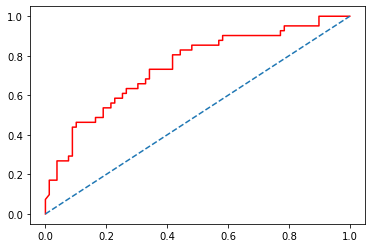

In [180]:
df = pd.read_csv("logistic_regression_01.csv")
df_dum = pd.get_dummies(data = df, columns = ["rank"], 
                        drop_first = True)
df_train, df_test = train_test_split(df_dum, train_size = 0.7,
                                     random_state = 123)
model = LogisticRegression(random_state = 123, max_iter = 200)
model.fit(X = df_train.drop("admit", axis = 1),
          y = df_train["admit"])

pred = model.predict_proba(df_test.drop("admit", axis = 1))
fpr, tpr, thresholds = roc_curve(df_test["admit"], pred[:, 1])
plt.plot(fpr, tpr, color = "#FF0000")
plt.plot([0, 1], [0, 1], linestyle = "--")

In [182]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_test["admit"], pred[:, 1])

0.7460635998765051

In [183]:
from sklearn.naive_bayes import GaussianNB

In [185]:
model_nb = GaussianNB().fit(X = df_train.drop("admit", axis = 1),
                            y = df_train["admit"])

In [186]:
pred = model_nb.predict_proba(df_test.drop("admit", axis = 1))[:, 1]
pred[:3]

array([0.55312937, 0.41835111, 0.6448483 ])

In [187]:
pred_class = np.where(pred > 0.5, 1, 0)
accuracy_score(df_test["admit"], pred_class)

0.7083333333333334

In [190]:
bike = pd.read_csv("bike.csv")
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["hour"] = bike["datetime"].dt.hour
bike["wday"] = bike["datetime"].dt.weekday
# bike.head(2)

<AxesSubplot:xlabel='hour'>

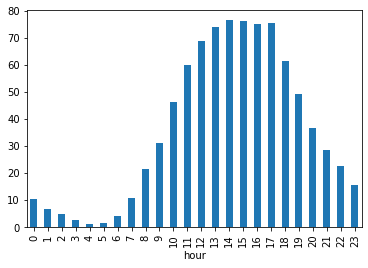

In [192]:
bike.groupby("hour")["casual"].mean().plot.bar()

In [193]:
bike.groupby("hour")["registered"].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

<AxesSubplot:xlabel='hour'>

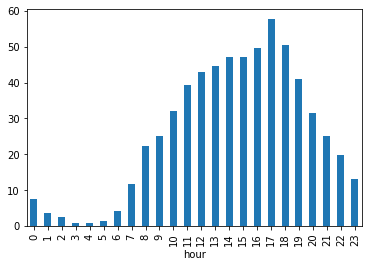

In [194]:
bike.loc[bike["wday"] < 5, ].groupby("hour")["casual"].mean().plot.bar()

In [195]:
bike.loc[bike["wday"] >= 5, ].groupby("hour")["casual"].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

<AxesSubplot:xlabel='hour'>

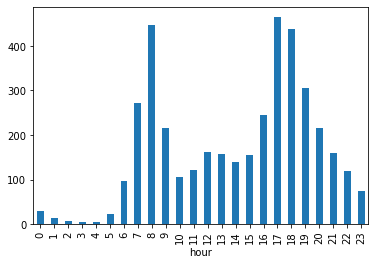

In [196]:
bike.loc[bike["wday"] < 5, ].groupby("hour")["registered"].mean().plot.bar()

In [197]:
bike.loc[bike["wday"] >= 5, ].groupby("hour")["registered"].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

In [198]:
bike.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  hour  wday  
0        81        0.0       3          13     16     0     5  
1        80        0.0       8          32     40     1     5